# Import libraries

In [300]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanessalimsingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessalimsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vanessalimsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [301]:
myfile = open('20thCentury.txt', encoding='utf-8') 

In [302]:
# Import txt file

with open('20thCentury.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

# Tokenization

In [304]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)


['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11

In [305]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise', 'of', 'd

In [306]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4882 samples and 20335 outcomes>


In [307]:
top_words=dist_words.most_common(10)

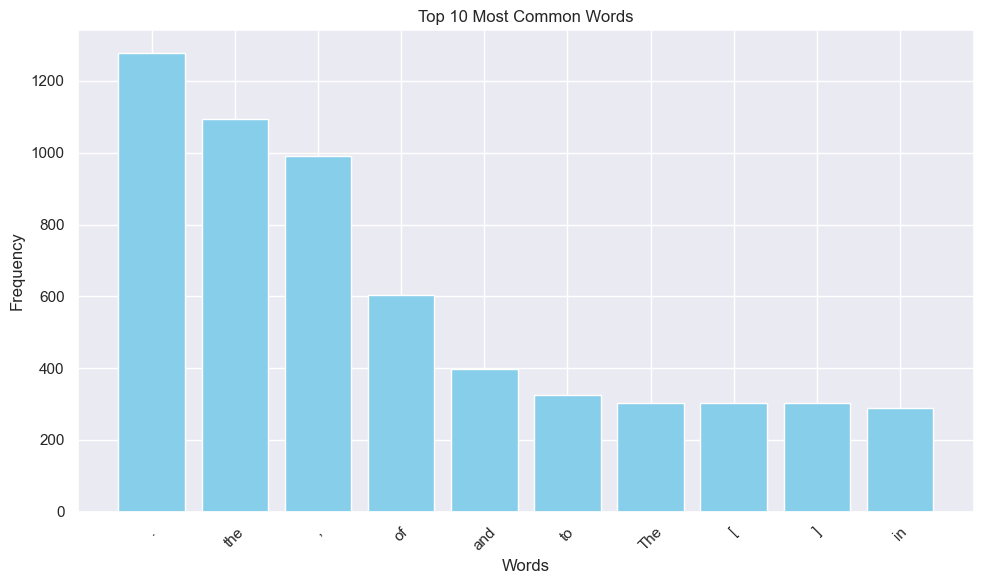

In [308]:
#create a bar chart

plt.figure(figsize=(10, 6)) 
words = [word[0] for word in top_words]
counts = [count[1] for count in top_words]

plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

In [309]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'them', 'doesn', 'below', 'they', 'itself', 'themselves', 'is', "didn't", 'theirs', 'of', 'each', 'in', 'their', 've', 'my', 'down', 'needn', 'have', 'where', 'be', 'doing', 'with', 'himself', 'yourselves', 'mustn', "mustn't", 'own', 'there', 'will', 'me', 'if', 'herself', 'her', "doesn't", 'the', 'until', 'isn', 'than', 'it', "isn't", 'are', 'she', 'few', 'weren', 'on', 'most', 'couldn', 'after', "she's", 'now', 'here', 'his', 'didn', "don't", 'he', 'again', 'under', 'out', "you're", 're', 'ourselves', "hasn't", "that'll", 'any', 'hers', 'no', 'o', 'not', 'whom', 'mightn', 'but', 'ma', 'we', 'just', 'over', 'who', 'from', 'once', 'same', 'don', "wasn't", "you'd", 'your', 'had', 'hadn', 'through', 'because', "you'll", 'should', 'm', 'ain', 'and', "weren't", 'were', 'can', "shouldn't", 'between', 'you', "should've", "wouldn't", "won't", 'or', 'at', 'more', 'y', 'why', 'hasn', 'yours', 'having', 'some', 'for', "shan't", 'aren', "couldn't", 'being', 'so', 'what', 'above', 'only', 'as', '

In [310]:
filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [311]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II',
 '(',
 '19

In [312]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4778 samples and 15677 outcomes>


In [313]:
# Extracting the top 10 words and their counts
top_words2 = dist_words_filter.most_common(10)
words2 = [word[0] for word in top_words2]
counts2 = [count[1] for count in top_words2]

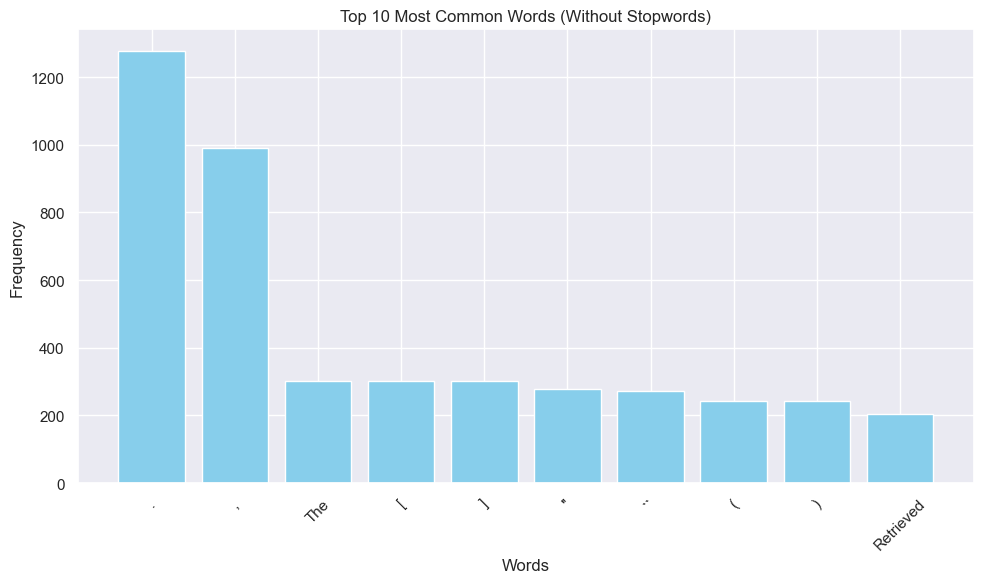

In [314]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words2, counts2, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (Without Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()


In [315]:
dist_words_filter

FreqDist({'.': 1277, ',': 990, 'The': 302, '[': 302, ']': 302, "''": 279, '``': 273, '(': 242, ')': 242, 'Retrieved': 205, ...})

In [316]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [317]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                The    war    Europe     Blitzkrieg     Operation    Ba

In [318]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [319]:
# create a new freqDist
dist_words_filter_2 = FreqDist (tokenized_word_2)

In [320]:
# Extracting the top 10 words and their counts
top_words3 = dist_words_filter_2.most_common(10)
words3 = [word[0] for word in top_words3]
counts3 = [count[1] for count in top_words3]

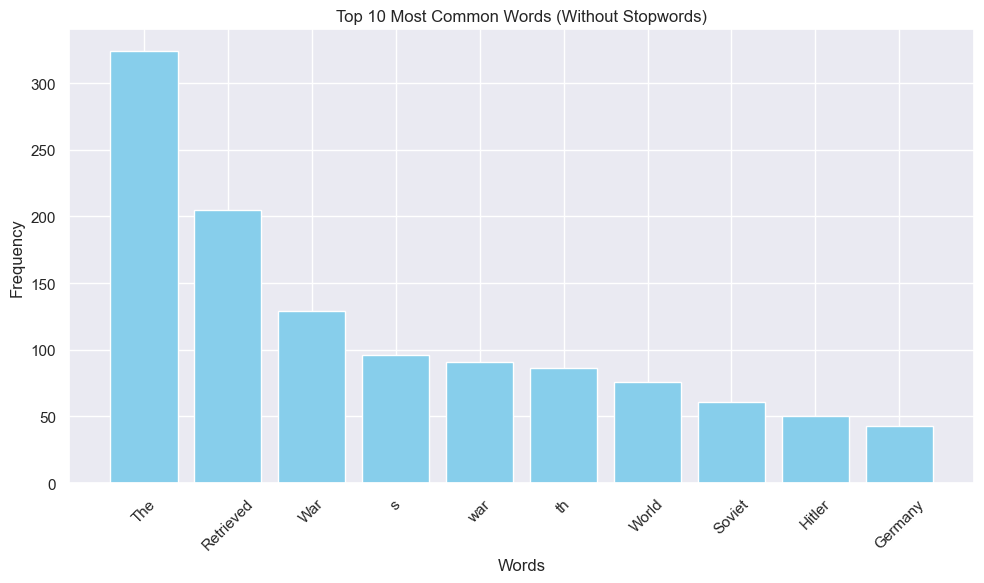

In [321]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words3, counts3, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words (Without Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()


## The bar chart yields more meaningful results after removing stopwords and punctuation.

In [323]:
# Create a tags list using TextBlob.

In [324]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [325]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [326]:
%%time
text = TextBlob(str(filtered))

CPU times: user 3.58 ms, sys: 101 μs, total: 3.68 ms
Wall time: 2.96 ms


In [327]:
text

TextBlob("['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'A

In [328]:
tags_list = text.tags

In [329]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 

In [330]:
#top 10 list

In [331]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [332]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [333]:
df_t=df_text.groupby ('Word type').count().reset_index()

In [334]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [335]:
top10 = df_t.nlargest(10, 'Words')

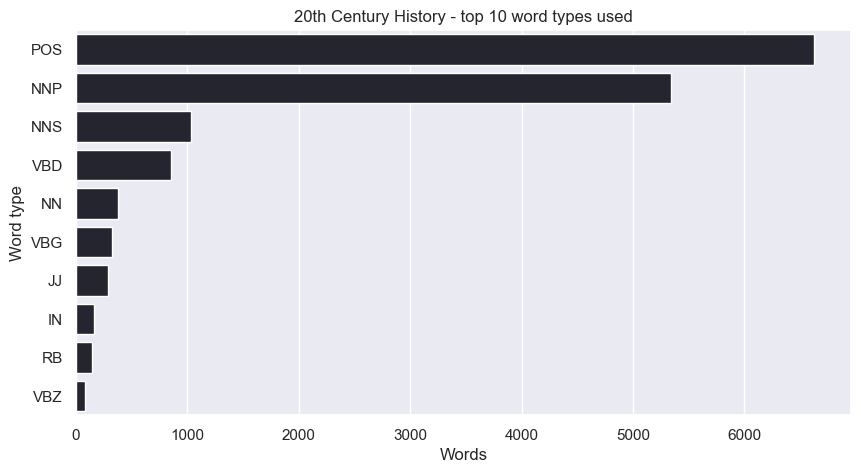

In [336]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century History - top 10 word types used")

In [337]:
#create 3 bar charts
# bar chart showing top 15 nouns
# bar chart showing top 15 verbs
# bar chart showing top 15 adjectives

In [338]:
#nouns

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurences')

Text(0.5, 1.0, 'Top 15 Nouns')

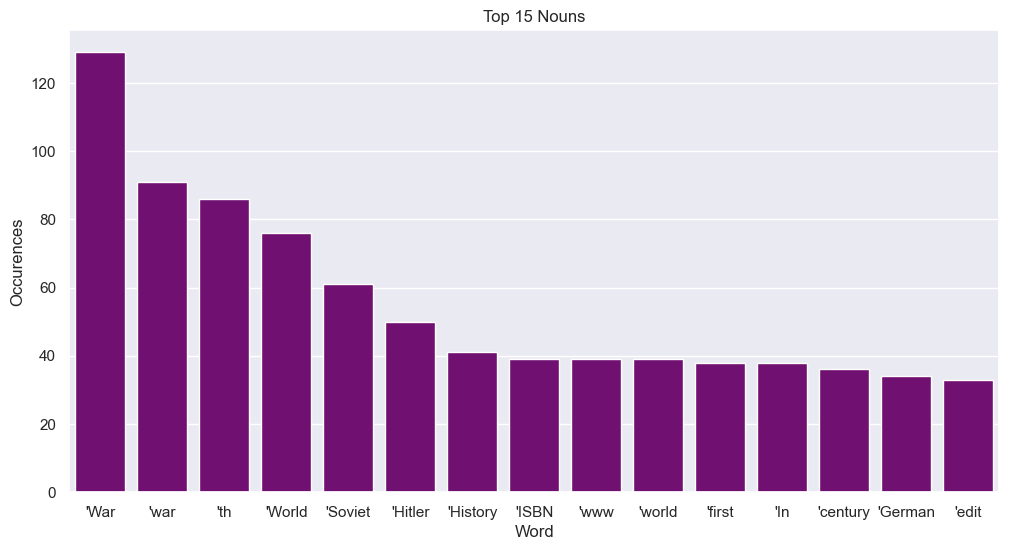

In [339]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Occurences', data=top15_nouns, color='purple')
plt.title('Top 15 Nouns')

In [340]:
#verbs

In [341]:
dfverbs = df_text[(df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBG") | (df_text['Word type'] == "VBZ")]
dfverbs.columns = ["Word", "Occurences"]
x_verbs = dfverbs.groupby('Word').count().reset_index()
y_verbs = x_verbs.sort_values(by = ['Occurences'], ascending=False)
top15_verbs = y_verbs.nlargest(15, 'Occurences')

Text(0.5, 1.0, 'Top 15 Verbs')

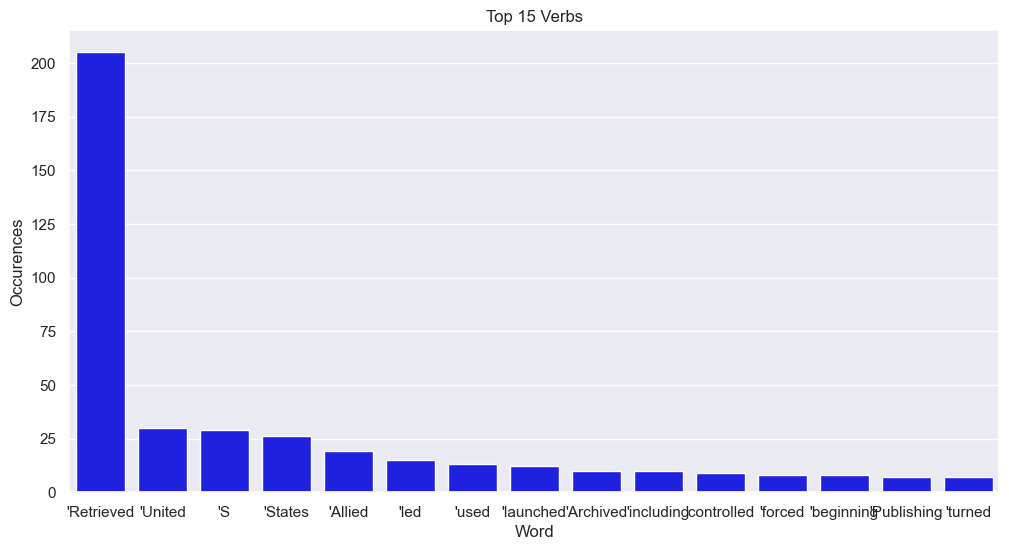

In [342]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Occurences', data=top15_verbs, color='blue')
plt.title('Top 15 Verbs')

In [343]:
# adjectives

In [344]:
df_adj = df_text[(df_text['Word type'] == "JJ")]
df_adj.columns = ["Word", "Occurences"]
x_adj = df_adj.groupby('Word').count().reset_index()
y_adj = x_adj.sort_values(by = ['Occurences'], ascending=False)
top15_adjectives = y_adj.nlargest(15, 'Occurences')

Text(0.5, 1.0, 'Top 15 Adjectives')

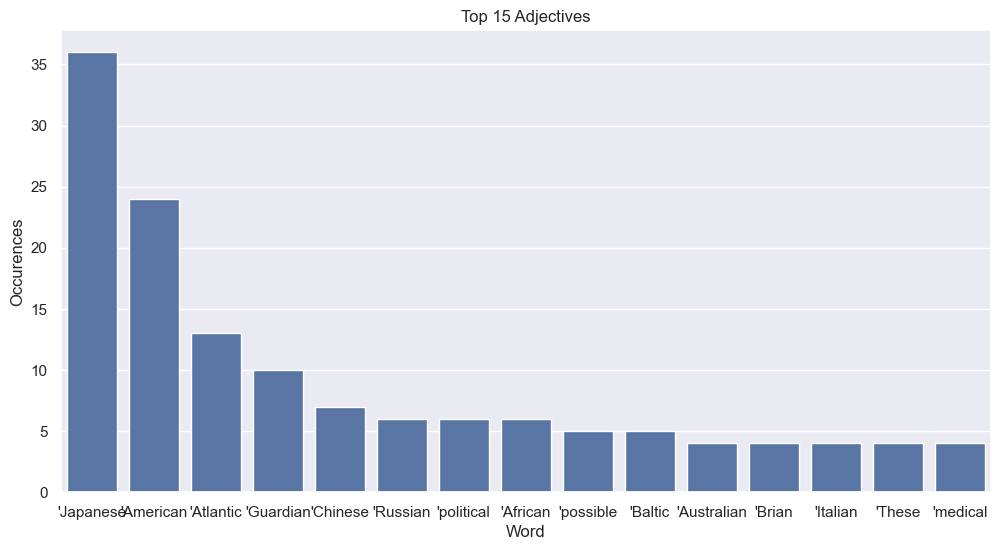

In [345]:
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Occurences', data=top15_adjectives)
plt.title ('Top 15 Adjectives')


# What stands out
Nouns: 
War is mentioned the most
There seems to be a focus on German(y) and Soviet/Russia.

Verbs:
Retrieved is heavily mentioned under verbs
There seems to a focus on US and allies (compared to nouns)

Adjectives:
Japanese, American, Atlantic are mentioned most under top adjectives. 
There is more of a global focus as compared to the nouns and verbs bar chart. 

In [347]:
# Create a dataframe with the countries and the number of times they’re mentioned

In [494]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events th century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events th centuryToggle Historic events th century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsK

In [496]:
# Create a count by using the regular expression W+ inside a Counter() function, 
# store the results in a dictionary so that you can see how frequently 
# each of the country appears

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [498]:
all_counts

Counter({'Retrieved': 205,
         'War': 129,
         'war': 91,
         'th': 86,
         'World': 76,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'century': 36,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'American': 24,
         'history': 23,
         'This': 23,
         'attack': 23,
         'weapons': 23,
         'new': 22,
         'Holocaust': 21,
         'Stalin': 21,
         '

In [500]:
dfcountries = pd.read_csv("countries.csv", index_col = 0)
pd.set_option('display.max_rows', 100)

In [502]:
#remove spaces trailing / leading spaces
dfcountries['country_name'] = dfcountries['country_name'].str.strip()

In [374]:
dfcountries.tail(30)

,country_name
180,Turkey
181,Turkmenistan
182,Tuvalu
183,Uganda
184,Ukraine
185,United Arab Emirates
186,United Kingdom
187,United States
188,Uruguay
189,Uzbekistan


In [504]:
dfcountries['country_name'] = dfcountries['country_name'].replace('United States', 'States')
dfcountries['country_name'] = dfcountries['country_name'].replace('United Kingdom', 'Britain')
dfcountries['country_name'] = dfcountries['country_name'].replace('Russia', 'Soviet')

In [392]:
dfcountries.tail(100)

,country_name
110,Malta
111,Marshall Islands
112,Mauritania
113,Mauritius
114,Mexico
115,"Micronesia, Federated States of"
116,Moldova
117,Monaco
118,Mongolia
119,Montenegro


In [506]:
dfcountries_list = dfcountries['country_name'].to_list()

In [508]:
dict_of_counts = {d : all_counts[d] for d in dfcountries_list}

In [510]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [512]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df_10 = pd.DataFrame(dct)

In [514]:
df_10

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [516]:
df_10 = df_10.transpose().reset_index()

In [518]:
df_10.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [520]:
df_10.tail(100)

,Country,Times mentioned
108,Malta,0
109,Marshall Islands,0
110,Mauritania,0
111,Mauritius,0
112,Mexico,1
113,"Micronesia, Federated States of",0
114,Moldova,0
115,Monaco,0
116,Mongolia,1
117,Montenegro,0


In [522]:
#filter to countries where times mentioned >=1

filtered_df_10 = df_10[df_10['Times mentioned'] >=1]

In [524]:
filtered_df_10

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
4,Angola,1
8,Australia,2
9,Austria,5
13,Bangladesh,2
15,Belarus,1
16,Belgium,2
25,Bulgaria,2


In [526]:
filtered_df_10 = filtered_df_10.sort_values(by='Times mentioned', ascending=False)

Text(0.5, 1.0, 'Number of Mentions per Country')

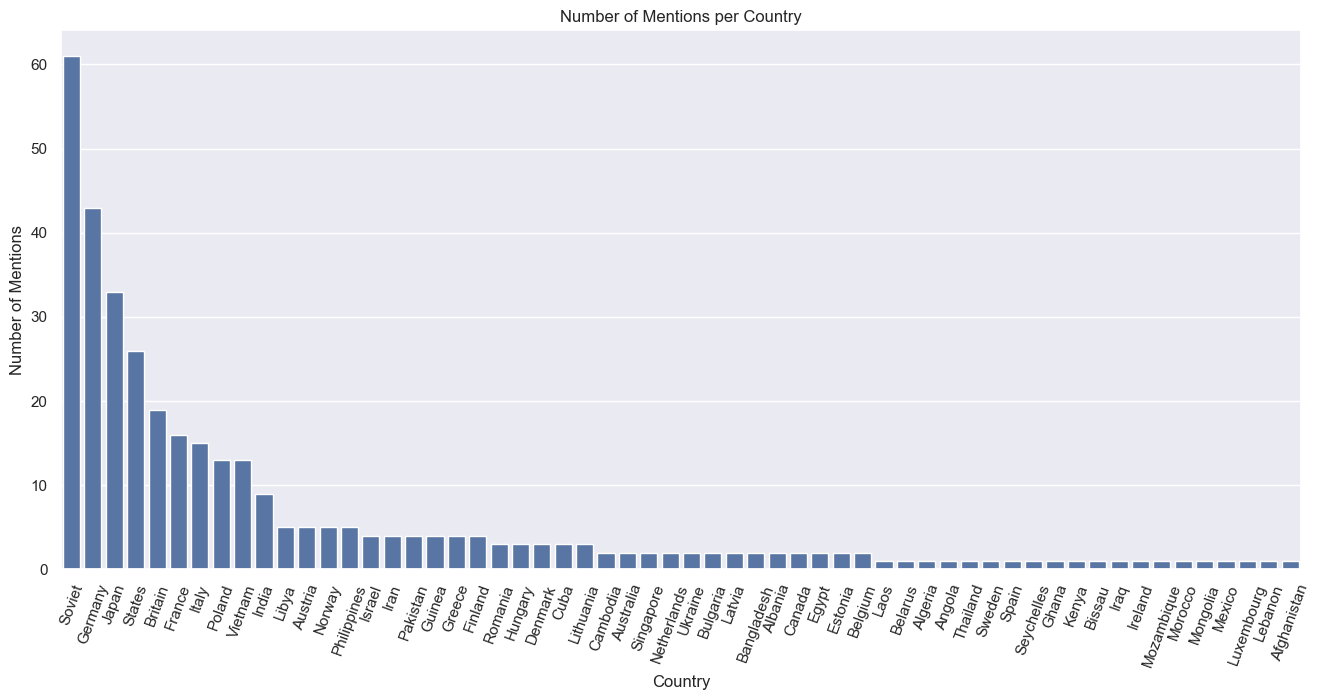

In [528]:
plt.figure(figsize=(16, 7))
sns.barplot(x='Country', y='Times mentioned', data=filtered_df_10)
plt.xlabel('Country')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=70)
plt.title('Number of Mentions per Country')

# Observations
Soviet(Russia), Germany, Japan, US, UK, France, Italy, Vietnam, Poland have the most mentions. This is in line with countries that heavily feature in the world wars and cold war history. 